**Business Analytics and Data Visualization**

Prof Jose Mendoza

Chapter 9 - Exercise 1

File: passingnfl_r.csv

*Note: Be careful that in the previous exercise, the data file has a similar name: nflpassing_r.csv, do not confuse the datasets.*

NFL Winning Percentage. The National Football League (NFL) records a variety of performance data for individuals and teams. To investigate the importance of passing on the percentage of games won by a team, the following data show the conference (Conf), average number of passing yards per attempt (Yds/Att), the number of interceptions thrown per attempt (Int/Att), and the percentage of games won (Win%) for a random sample of 16 National Football League (NFL) teams for one full season.

> Note: This notebook assumes that the file breakfast.csv is located in Google Drive, in a folder named 'Data'. *



In [ ]:
import pandas as pd

# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read data file from the Data folder

from google.colab import drive
drive.mount('/content/drive')

# Remember to check the file names, problem 22 has a similar file name

df = pd.read_csv('/content/drive/My Drive/Data/passingnfl_r.csv')
df.head()

Mounted at /content/drive


,Team,Conf,Yds_Att,Int_Att,Win
0,Arizona Cardinals,NFC,6.5,0.042,50.0
1,Atlanta Falcons,NFC,7.1,0.022,62.5
2,Carolina Panthers,NFC,7.4,0.033,37.5
3,Cincinnati Bengals,AFC,6.2,0.026,56.3
4,Detroit Lions,NFC,7.2,0.024,62.5


In [ ]:
# Let's print the column names to prevent any suprises with misspellings!
print(df.columns)

Index(['Team', 'Conf', 'Yds_Att', 'Int_Att', 'Win'], dtype='object')


**1. Develop the estimated regression equation that could be used to predict the percentage of games won given the average number of passing yards per attempt.**

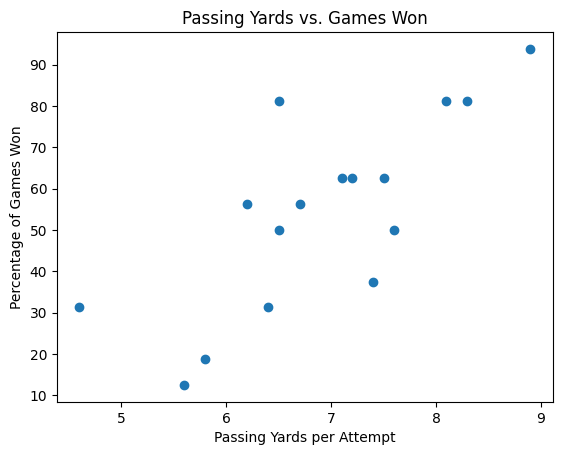

In [ ]:
# Develop a scatter diagram with the number of passing yards per attempt on the
# horizontal axis and the percentage of games won on the vertical axis.

import matplotlib.pyplot as plt

plt.scatter(df['Yds_Att'], df['Win'])
plt.xlabel('Passing Yards per Attempt')
plt.ylabel('Percentage of Games Won')
plt.title('Passing Yards vs. Games Won')
plt.show()


In [ ]:
# Perform a linear regression with Win and Yds

import statsmodels.formula.api as sm

# Perform linear regression
result = sm.ols('Win ~ Yds_Att', data=df).fit()

# Print the regression summary
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                    Win   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     19.11
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           0.000639
Time:                        15:02:28   Log-Likelihood:                -65.869
No. Observations:                  16   AIC:                             135.7
Df Residuals:                      14   BIC:                             137.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -58.7703     26.175     -2.245      0.0

**2. Develop the estimated regression equation that could be used to predict the percentage of games won given the number of interceptions thrown per attempt.**

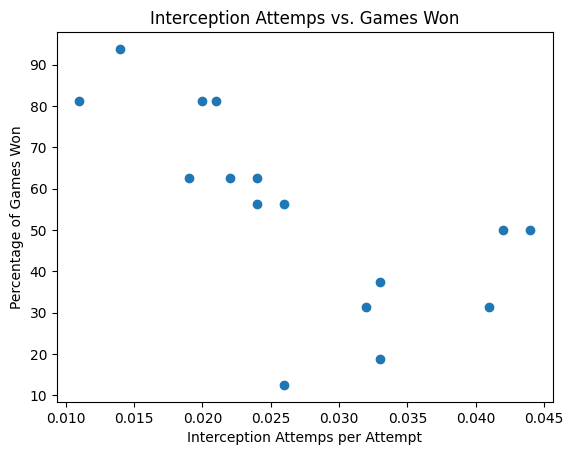

In [ ]:
# Develop a scatter diagram with the number of interception attempts on the
# horizontal axis and the percentage of games won on the vertical axis.

import matplotlib.pyplot as plt

plt.scatter(df['Int_Att'], df['Win'])
plt.xlabel('Interception Attemps per Attempt')
plt.ylabel('Percentage of Games Won')
plt.title('Interception Attemps vs. Games Won')
plt.show()

In [ ]:
# Perform a linear regression with Win and Int_Att

import statsmodels.formula.api as sm

# Perform linear regression
result = sm.ols('Win ~ Int_Att', data=df).fit()

# Print the regression summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    Win   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     10.91
Date:                Wed, 07 Aug 2024   Prob (F-statistic):            0.00524
Time:                        15:05:35   Log-Likelihood:                -68.146
No. Observations:                  16   AIC:                             140.3
Df Residuals:                      14   BIC:                             141.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.5383     13.862      7.036      0.0

**3. Develop the estimated regression equation that could be used to predict the percentage of games won given the average number of passing yards per attempt and the number of interceptions thrown per attempt.**

In [ ]:
# Perform a linear regression with Win and Int_Att

import statsmodels.formula.api as sm

# Perform linear regression
result = sm.ols('Win ~ Yds_Att + Int_Att', data=df).fit()

# Print the regression summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    Win   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     19.76
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           0.000114
Time:                        15:09:55   Log-Likelihood:                -61.584
No. Observations:                  16   AIC:                             129.2
Df Residuals:                      13   BIC:                             131.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7633     27.147     -0.212      0.8

In [ ]:
# Create a vector of predicted values

# Get the predicted values
predicted_values = result.predict()

# Print the predicted values
print(predicted_values)


[32.88843813 62.33381104 54.29695043 46.34423853 61.46117076 94.31295607
 70.76491744 38.57462474 19.12254068 33.57798031 80.04061454 76.36695532
 44.96515417 66.48586477 54.9864926  32.67729045]


In [ ]:
# Create a vector of residual values

# Get the residuals
residuals = result.resid

# Print the residuals
print(residuals)


0     17.111562
1      0.166189
2    -16.796950
3      9.955761
4      1.038829
5     -0.512956
6     -8.264917
7    -26.074625
8     12.177459
9    -14.777980
10     1.259385
11     4.933045
12     5.034846
13    14.814135
14     1.313507
15    -1.377290
dtype: float64


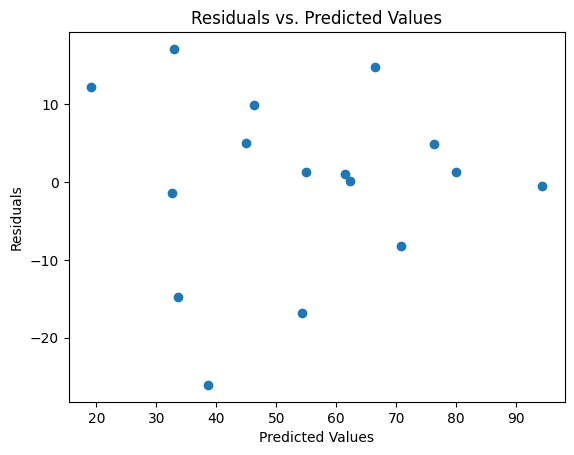

In [ ]:
# Plot residuals against predicted values

import matplotlib.pyplot as plt

# Plot residuals against predicted values
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


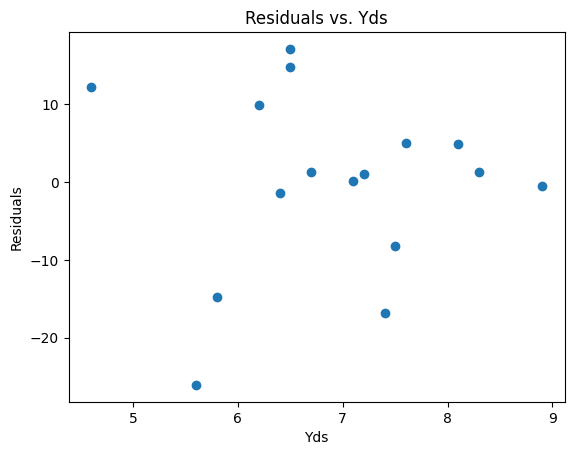

In [ ]:
# Plot residuals vs. Yds

# Plot residuals against Yds
plt.scatter(df['Yds_Att'], residuals)
plt.xlabel('Yds')
plt.ylabel('Residuals')
plt.title('Residuals vs. Yds')
plt.show()


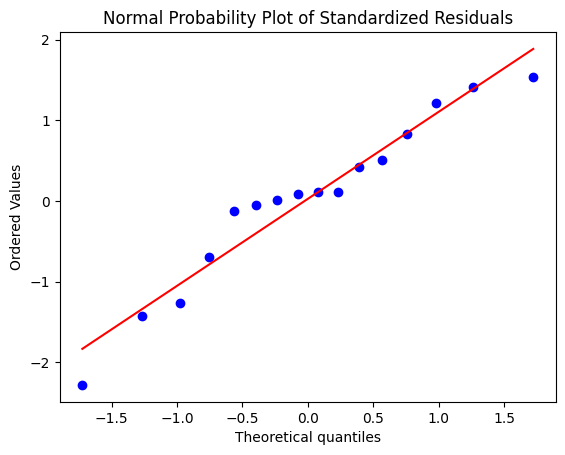

In [ ]:
# Produce a normal probability plot of standardized residuals

import scipy.stats as stats

# Calculate standardized residuals
standardized_residuals = result.get_influence().resid_studentized_internal

# Create a normal probability plot
stats.probplot(standardized_residuals, plot=plt)
plt.title('Normal Probability Plot of Standardized Residuals')
plt.show()


In [ ]:
# Create a list of standardize residuals

# Calculate standardized residuals
standardized_residuals = result.get_influence().resid_studentized_internal

#create a list of standardize residuals
standardized_residuals_list = standardized_residuals.tolist()
print(standardized_residuals_list)


[1.5401811214453605, 0.013748760341497916, -1.4229824430920988, 0.8318848124375748, 0.08551810850957785, -0.04940416502416358, -0.6961170640838534, -2.281967632299083, 1.209707980879704, -1.2608763784927228, 0.11016335058171135, 0.4237541083459386, 0.5100916786290847, 1.4160934079860663, 0.10839018279488005, -0.1222007102318936]


In [ ]:
# Calculate the hat values

# Calculate hat values
influence = result.get_influence()
hat_values = influence.hat_matrix_diag

# Print hat values
print(hat_values)


[0.22280249 0.08003157 0.1226811  0.09818332 0.07088848 0.32122019
 0.11241865 0.17792231 0.3619599  0.13507024 0.17711572 0.14670747
 0.38656074 0.31092817 0.07534262 0.20016702]


In [ ]:
# Calculate the Cook's D Statistics

# Calculate Cook's D statistics
cooks_d = influence.cooks_distance[0]

# Print Cook's D statistics
print(cooks_d)


[2.26678834e-01 5.48143482e-06 9.43839154e-02 2.51145025e-02
 1.85995639e-04 3.85016902e-04 2.04584859e-02 3.75677552e-01
 2.76727504e-01 8.27565921e-02 8.70705664e-04 1.02910781e-02
 5.46539311e-02 3.01618598e-01 3.19093937e-04 1.24571712e-03]


In [ ]:
# Create a new data frame to predict the Yds_Att = 6.2 and Int_Att = 3.6%

# Create a new DataFrame for prediction
new_data = pd.DataFrame({'Yds_Att': [6.2], 'Int_Att': [0.036]})

# Predict win for the new data
predicted_win = result.predict(new_data)

# Calculate the 95% confidence interval for the prediction
prediction_interval = result.get_prediction(new_data).summary_frame(alpha=0.05)

# Print the predicted sales
print(predicted_win, prediction_interval)


0    35.506359
dtype: float64         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  35.506359  4.486292      25.814315      45.198403      6.606917   

   obs_ci_upper  
0     64.405801  
